In [1]:
#1. Import libraries
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import keras

In [2]:
#2. Import dataset
data = pd.read_csv("D:\Tài liệu PTDLKD\Data_stock_SCS_VN.csv")
data

,time,open,high,low,close,volume
0,2019-03-01,59960,59960,59920,59960,34010
1,2019-03-04,59960,60080,58980,59960,8580
2,2019-03-05,58720,60010,58720,59960,35720
3,2019-03-06,59960,60130,59960,59960,9290
4,2019-03-07,59960,60400,59960,60330,19290
...,...,...,...,...,...,...
1310,2024-05-27,90900,90900,88900,90000,59200
1311,2024-05-28,89500,91000,89300,90000,109100
1312,2024-05-29,90100,91500,90000,90300,121100
1313,2024-05-30,90300,90300,88500,89700,82600


In [3]:
#3. Scaler data for RNN model
data_rnn=data.reset_index()['close']
scaler=MinMaxScaler(feature_range=(0,1))
data_rnn=scaler.fit_transform(np.array(data_rnn).reshape(-1,1))

In [4]:
#4. Split the data into train and test sets
train_size = int(0.9 * len(data_rnn))
test_size = len(data_rnn) - train_size
train_rnn = data_rnn[:train_size]
test_rnn = data_rnn[train_size:]

In [5]:
#5. Function to create a dataset for RNN model
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 [samples, time steps, features] and Y=t+100 [samples]
time_step = 100
x_train_rnn, y_train_rnn = create_dataset(train_rnn, time_step)
x_test_rnn, y_test_rnn = create_dataset(test_rnn, time_step)
x_train_rnn =x_train_rnn.reshape(x_train_rnn.shape[0],x_train_rnn.shape[1] , 1)
x_test_rnn = x_test_rnn.reshape(x_test_rnn.shape[0],x_test_rnn.shape[1] , 1)

In [7]:
#7. Proceed to define the RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64,input_shape=(time_step, 1)))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\THAI NGOC DUNG\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
#8. Fit model with train data
model_rnn.fit(x_train_rnn,y_train_rnn,validation_data=(x_test_rnn,y_test_rnn),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.3266 - val_loss: 0.1278
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0081 - val_loss: 0.0239
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029 - val_loss: 0.0145
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0022 - val_loss: 0.0113
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0019 - val_loss: 0.0104
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0015 - val_loss: 0.0088
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014 - val_loss: 0.0071
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0013 - val_loss: 0.0059
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0012 - val_loss: 0.0051
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0011 - val_loss: 0.0042
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0011 - val_loss: 0.0042
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Epoch 67/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.0198e-04 - val_loss: 0.0018
Epoch 68/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.7452e-04 - val_loss: 0.0019
Epoch 69/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.0174e-04 - val_loss: 0.0014
Epoch 70/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.4024e-04 - val_loss: 0.0012
Epoch 71/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.5917e-04 - val_loss: 0.0012
Epoch 72/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.8563e-04 - val_loss: 0.0012
Epoch 73/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.9728e-04 - val_loss: 0.0014
Epoch 74/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.7656e-04 - val_loss: 9.4480e-04
Epoch 75/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.7285e-04 - val_loss: 8.8015e-04
Epoch 76/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.8359e-04 - val_loss: 9.1746e-04
Epoch 77/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.5166e-04 - val_

In [9]:
#9. Predict on the test data, then perform data normalization
pred_test_rnn=model_rnn.predict(x_test_rnn)
pred_test_rnn=scaler.inverse_transform(pred_test_rnn)
check_pred_test_rnn=scaler.inverse_transform(test_rnn)[(time_step+1):]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step


In [10]:
#10. Evaluate model performance using RMSE, MAPE, and MSLE
rmse = np.sqrt(mean_squared_error(pred_test_rnn,check_pred_test_rnn))
mape = mean_absolute_percentage_error(pred_test_rnn,check_pred_test_rnn) * 100
msle = mean_squared_log_error(pred_test_rnn,check_pred_test_rnn)
print("RMSE:", rmse)
print("MAPE:", mape ,"%")
print("MSLE:", msle)

RMSE: 2145.4176551857663
MAPE: 2.029331840593162 %
MSLE: 0.0006468902579571046


In [11]:
#11. Predict close prices for the next 30, 60, 90 days
x_input=test_rnn[-(time_step+1):].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=time_step
i=0
while(i<90):
    
    if(len(temp_input)>time_step):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model_rnn.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.57260172 0.5912654  0.56513624 0.55953714 0.54647256 0.54833893
 0.53900709 0.53900709 0.52967525 0.53154162 0.53714072 0.53527436
 0.53527436 0.54087346 0.51287794 0.50912654 0.50541247 0.50727884
 0.53900709 0.52780888 0.52780888 0.59873087 0.63979097 0.62486002
 0.62112729 0.6379246  0.64912281 0.65098918 0.64725644 0.65285554
 0.66592012 0.70324748 0.70324748 0.68085106 0.71071295 0.69764838
 0.71257932 0.70511385 0.72191116 0.71817842 0.74057484 0.73870847
 0.76483763 0.79656588 0.78723404 0.78723404 0.79656588 0.80776409
 0.76297126 0.731243   0.73684211 0.72004479 0.71631206 0.71257932
 0.71257932 0.71071295 0.70511385 0.72004479 0.72004479 0.70698022
 0.70324748 0.68085106 0.77416947 0.75923852 0.75923852 0.76857036
 0.78350131 0.77416947 0.80963046 0.75923852 0.77416947 0.76483763
 0.74990668 0.74244121 0.78723404 0.7779022  0.8245614  0.79656588
 0.8656215  0.85255692 0.87868608 0.94960806 0.93654349 0.92721165
 0.96453901 0.92721165 0.92907801 0.94587533 0.945

8 day output [[0.9005481]]
9 day input [0.53154162 0.53714072 0.53527436 0.53527436 0.54087346 0.51287794
 0.50912654 0.50541247 0.50727884 0.53900709 0.52780888 0.52780888
 0.59873087 0.63979097 0.62486002 0.62112729 0.6379246  0.64912281
 0.65098918 0.64725644 0.65285554 0.66592012 0.70324748 0.70324748
 0.68085106 0.71071295 0.69764838 0.71257932 0.70511385 0.72191116
 0.71817842 0.74057484 0.73870847 0.76483763 0.79656588 0.78723404
 0.78723404 0.79656588 0.80776409 0.76297126 0.731243   0.73684211
 0.72004479 0.71631206 0.71257932 0.71257932 0.71071295 0.70511385
 0.72004479 0.72004479 0.70698022 0.70324748 0.68085106 0.77416947
 0.75923852 0.75923852 0.76857036 0.78350131 0.77416947 0.80963046
 0.75923852 0.77416947 0.76483763 0.74990668 0.74244121 0.78723404
 0.7779022  0.8245614  0.79656588 0.8656215  0.85255692 0.87868608
 0.94960806 0.93654349 0.92721165 0.96453901 0.92721165 0.92907801
 0.94587533 0.94587533 0.93281075 0.93467712 0.96267264 0.98880179
 0.98320269 1.         

16 day output [[0.8575831]]
17 day input [0.50727884 0.53900709 0.52780888 0.52780888 0.59873087 0.63979097
 0.62486002 0.62112729 0.6379246  0.64912281 0.65098918 0.64725644
 0.65285554 0.66592012 0.70324748 0.70324748 0.68085106 0.71071295
 0.69764838 0.71257932 0.70511385 0.72191116 0.71817842 0.74057484
 0.73870847 0.76483763 0.79656588 0.78723404 0.78723404 0.79656588
 0.80776409 0.76297126 0.731243   0.73684211 0.72004479 0.71631206
 0.71257932 0.71257932 0.71071295 0.70511385 0.72004479 0.72004479
 0.70698022 0.70324748 0.68085106 0.77416947 0.75923852 0.75923852
 0.76857036 0.78350131 0.77416947 0.80963046 0.75923852 0.77416947
 0.76483763 0.74990668 0.74244121 0.78723404 0.7779022  0.8245614
 0.79656588 0.8656215  0.85255692 0.87868608 0.94960806 0.93654349
 0.92721165 0.96453901 0.92721165 0.92907801 0.94587533 0.94587533
 0.93281075 0.93467712 0.96267264 0.98880179 0.98320269 1.
 0.98320269 0.98320269 0.98880179 0.97760358 0.98320269 0.96313673
 0.95898235 0.94909054 0.94108

24 day output [[0.8311659]]
25 day input [0.6379246  0.64912281 0.65098918 0.64725644 0.65285554 0.66592012
 0.70324748 0.70324748 0.68085106 0.71071295 0.69764838 0.71257932
 0.70511385 0.72191116 0.71817842 0.74057484 0.73870847 0.76483763
 0.79656588 0.78723404 0.78723404 0.79656588 0.80776409 0.76297126
 0.731243   0.73684211 0.72004479 0.71631206 0.71257932 0.71257932
 0.71071295 0.70511385 0.72004479 0.72004479 0.70698022 0.70324748
 0.68085106 0.77416947 0.75923852 0.75923852 0.76857036 0.78350131
 0.77416947 0.80963046 0.75923852 0.77416947 0.76483763 0.74990668
 0.74244121 0.78723404 0.7779022  0.8245614  0.79656588 0.8656215
 0.85255692 0.87868608 0.94960806 0.93654349 0.92721165 0.96453901
 0.92721165 0.92907801 0.94587533 0.94587533 0.93281075 0.93467712
 0.96267264 0.98880179 0.98320269 1.         0.98320269 0.98320269
 0.98880179 0.97760358 0.98320269 0.96313673 0.95898235 0.94909054
 0.94108993 0.93196499 0.92554075 0.91567177 0.90740985 0.9005481
 0.89400053 0.88805622 

32 day output [[0.8148097]]
33 day input [0.68085106 0.71071295 0.69764838 0.71257932 0.70511385 0.72191116
 0.71817842 0.74057484 0.73870847 0.76483763 0.79656588 0.78723404
 0.78723404 0.79656588 0.80776409 0.76297126 0.731243   0.73684211
 0.72004479 0.71631206 0.71257932 0.71257932 0.71071295 0.70511385
 0.72004479 0.72004479 0.70698022 0.70324748 0.68085106 0.77416947
 0.75923852 0.75923852 0.76857036 0.78350131 0.77416947 0.80963046
 0.75923852 0.77416947 0.76483763 0.74990668 0.74244121 0.78723404
 0.7779022  0.8245614  0.79656588 0.8656215  0.85255692 0.87868608
 0.94960806 0.93654349 0.92721165 0.96453901 0.92721165 0.92907801
 0.94587533 0.94587533 0.93281075 0.93467712 0.96267264 0.98880179
 0.98320269 1.         0.98320269 0.98320269 0.98880179 0.97760358
 0.98320269 0.96313673 0.95898235 0.94909054 0.94108993 0.93196499
 0.92554075 0.91567177 0.90740985 0.9005481  0.89400053 0.88805622
 0.88180792 0.87826103 0.87101889 0.86679488 0.86147296 0.85758311
 0.85405582 0.8498553

40 day output [[0.80211014]]
41 day input [0.73870847 0.76483763 0.79656588 0.78723404 0.78723404 0.79656588
 0.80776409 0.76297126 0.731243   0.73684211 0.72004479 0.71631206
 0.71257932 0.71257932 0.71071295 0.70511385 0.72004479 0.72004479
 0.70698022 0.70324748 0.68085106 0.77416947 0.75923852 0.75923852
 0.76857036 0.78350131 0.77416947 0.80963046 0.75923852 0.77416947
 0.76483763 0.74990668 0.74244121 0.78723404 0.7779022  0.8245614
 0.79656588 0.8656215  0.85255692 0.87868608 0.94960806 0.93654349
 0.92721165 0.96453901 0.92721165 0.92907801 0.94587533 0.94587533
 0.93281075 0.93467712 0.96267264 0.98880179 0.98320269 1.
 0.98320269 0.98320269 0.98880179 0.97760358 0.98320269 0.96313673
 0.95898235 0.94909054 0.94108993 0.93196499 0.92554075 0.91567177
 0.90740985 0.9005481  0.89400053 0.88805622 0.88180792 0.87826103
 0.87101889 0.86679488 0.86147296 0.85758311 0.85405582 0.84985536
 0.84598285 0.84217817 0.83896613 0.83658361 0.83388078 0.83116591
 0.82801133 0.82606012 0.8238

49 day output [[0.7909828]]
50 day input [0.73684211 0.72004479 0.71631206 0.71257932 0.71257932 0.71071295
 0.70511385 0.72004479 0.72004479 0.70698022 0.70324748 0.68085106
 0.77416947 0.75923852 0.75923852 0.76857036 0.78350131 0.77416947
 0.80963046 0.75923852 0.77416947 0.76483763 0.74990668 0.74244121
 0.78723404 0.7779022  0.8245614  0.79656588 0.8656215  0.85255692
 0.87868608 0.94960806 0.93654349 0.92721165 0.96453901 0.92721165
 0.92907801 0.94587533 0.94587533 0.93281075 0.93467712 0.96267264
 0.98880179 0.98320269 1.         0.98320269 0.98320269 0.98880179
 0.97760358 0.98320269 0.96313673 0.95898235 0.94909054 0.94108993
 0.93196499 0.92554075 0.91567177 0.90740985 0.9005481  0.89400053
 0.88805622 0.88180792 0.87826103 0.87101889 0.86679488 0.86147296
 0.85758311 0.85405582 0.84985536 0.84598285 0.84217817 0.83896613
 0.83658361 0.83388078 0.83116591 0.82801133 0.82606012 0.82388037
 0.82258254 0.82002455 0.81880194 0.81588155 0.81480968 0.81268293
 0.81135792 0.8095417

57 day output [[0.7840421]]
58 day input [0.72004479 0.70698022 0.70324748 0.68085106 0.77416947 0.75923852
 0.75923852 0.76857036 0.78350131 0.77416947 0.80963046 0.75923852
 0.77416947 0.76483763 0.74990668 0.74244121 0.78723404 0.7779022
 0.8245614  0.79656588 0.8656215  0.85255692 0.87868608 0.94960806
 0.93654349 0.92721165 0.96453901 0.92721165 0.92907801 0.94587533
 0.94587533 0.93281075 0.93467712 0.96267264 0.98880179 0.98320269
 1.         0.98320269 0.98320269 0.98880179 0.97760358 0.98320269
 0.96313673 0.95898235 0.94909054 0.94108993 0.93196499 0.92554075
 0.91567177 0.90740985 0.9005481  0.89400053 0.88805622 0.88180792
 0.87826103 0.87101889 0.86679488 0.86147296 0.85758311 0.85405582
 0.84985536 0.84598285 0.84217817 0.83896613 0.83658361 0.83388078
 0.83116591 0.82801133 0.82606012 0.82388037 0.82258254 0.82002455
 0.81880194 0.81588155 0.81480968 0.81268293 0.81135792 0.8095417
 0.80786347 0.80635339 0.8049528  0.80336708 0.80211014 0.8002888
 0.79907113 0.79776424 0

65 day output [[0.7786016]]
66 day input [0.78350131 0.77416947 0.80963046 0.75923852 0.77416947 0.76483763
 0.74990668 0.74244121 0.78723404 0.7779022  0.8245614  0.79656588
 0.8656215  0.85255692 0.87868608 0.94960806 0.93654349 0.92721165
 0.96453901 0.92721165 0.92907801 0.94587533 0.94587533 0.93281075
 0.93467712 0.96267264 0.98880179 0.98320269 1.         0.98320269
 0.98320269 0.98880179 0.97760358 0.98320269 0.96313673 0.95898235
 0.94909054 0.94108993 0.93196499 0.92554075 0.91567177 0.90740985
 0.9005481  0.89400053 0.88805622 0.88180792 0.87826103 0.87101889
 0.86679488 0.86147296 0.85758311 0.85405582 0.84985536 0.84598285
 0.84217817 0.83896613 0.83658361 0.83388078 0.83116591 0.82801133
 0.82606012 0.82388037 0.82258254 0.82002455 0.81880194 0.81588155
 0.81480968 0.81268293 0.81135792 0.8095417  0.80786347 0.80635339
 0.8049528  0.80336708 0.80211014 0.8002888  0.79907113 0.79776424
 0.79650176 0.79542828 0.79418367 0.79310846 0.79197711 0.79098278
 0.78993154 0.7890282

73 day output [[0.77417105]]
74 day input [0.78723404 0.7779022  0.8245614  0.79656588 0.8656215  0.85255692
 0.87868608 0.94960806 0.93654349 0.92721165 0.96453901 0.92721165
 0.92907801 0.94587533 0.94587533 0.93281075 0.93467712 0.96267264
 0.98880179 0.98320269 1.         0.98320269 0.98320269 0.98880179
 0.97760358 0.98320269 0.96313673 0.95898235 0.94909054 0.94108993
 0.93196499 0.92554075 0.91567177 0.90740985 0.9005481  0.89400053
 0.88805622 0.88180792 0.87826103 0.87101889 0.86679488 0.86147296
 0.85758311 0.85405582 0.84985536 0.84598285 0.84217817 0.83896613
 0.83658361 0.83388078 0.83116591 0.82801133 0.82606012 0.82388037
 0.82258254 0.82002455 0.81880194 0.81588155 0.81480968 0.81268293
 0.81135792 0.8095417  0.80786347 0.80635339 0.8049528  0.80336708
 0.80211014 0.8002888  0.79907113 0.79776424 0.79650176 0.79542828
 0.79418367 0.79310846 0.79197711 0.79098278 0.78993154 0.78902823
 0.788068   0.78722107 0.78639579 0.78564471 0.78482664 0.78404212
 0.78324819 0.782525

81 day output [[0.77053624]]
82 day input [0.93654349 0.92721165 0.96453901 0.92721165 0.92907801 0.94587533
 0.94587533 0.93281075 0.93467712 0.96267264 0.98880179 0.98320269
 1.         0.98320269 0.98320269 0.98880179 0.97760358 0.98320269
 0.96313673 0.95898235 0.94909054 0.94108993 0.93196499 0.92554075
 0.91567177 0.90740985 0.9005481  0.89400053 0.88805622 0.88180792
 0.87826103 0.87101889 0.86679488 0.86147296 0.85758311 0.85405582
 0.84985536 0.84598285 0.84217817 0.83896613 0.83658361 0.83388078
 0.83116591 0.82801133 0.82606012 0.82388037 0.82258254 0.82002455
 0.81880194 0.81588155 0.81480968 0.81268293 0.81135792 0.8095417
 0.80786347 0.80635339 0.8049528  0.80336708 0.80211014 0.8002888
 0.79907113 0.79776424 0.79650176 0.79542828 0.79418367 0.79310846
 0.79197711 0.79098278 0.78993154 0.78902823 0.788068   0.78722107
 0.78639579 0.78564471 0.78482664 0.78404212 0.78324819 0.78252584
 0.7817539  0.78115404 0.78043211 0.77986932 0.77918452 0.77860159
 0.77796376 0.77738476

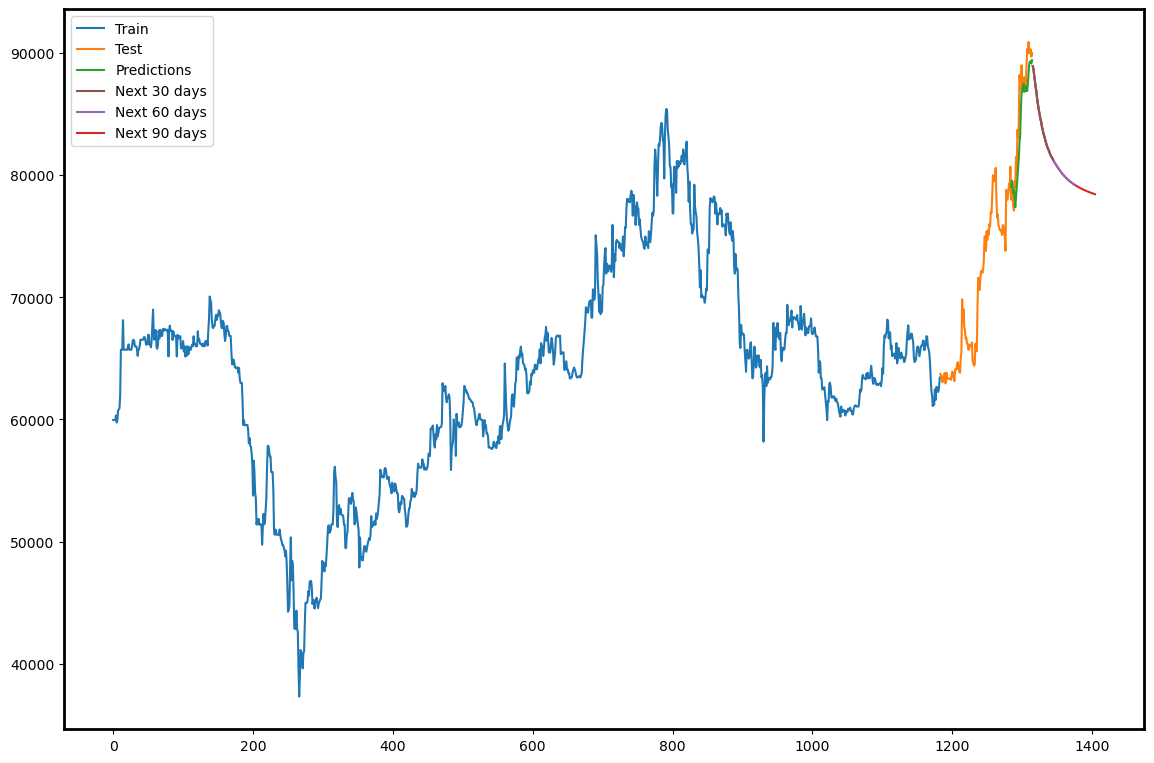

In [12]:
#12. Draw the plot
plt.figure(figsize=(12, 8))
train_index = pd.RangeIndex(start=0, stop=train_size, step=1)
line1, = plt.plot(train_index, scaler.inverse_transform(train_rnn), label="Train")

test_index = pd.RangeIndex(start=train_size, stop=train_size + test_size, step=1)
line2, = plt.plot(test_index, scaler.inverse_transform(test_rnn), label="Test")

pred_index = pd.RangeIndex(start=train_size + 101, stop=train_size + test_size, step=1)
line3, = plt.plot(pred_index, pred_test_rnn, label="Predictions")

pred90_index = pd.RangeIndex(start=len(data), stop=len(data) + 90, step=1)
line4, = plt.plot(pred90_index, scaler.inverse_transform(lst_output), label="Next 90 days")

pred60_index = pd.RangeIndex(start=len(data), stop=len(data) + 60, step=1)
line5, = plt.plot(pred60_index, scaler.inverse_transform(lst_output[:60]), label="Next 60 days")

pred30_index = pd.RangeIndex(start=len(data), stop=len(data) + 30, step=1)
line6, = plt.plot(pred30_index, scaler.inverse_transform(lst_output[:30]), label="Next 30 days")

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
    
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.savefig("D:\Tài liệu PTDLKD\Image_Result\RNN_SCS_91.png")
plt.show()